In [1]:
from maelzel.partialtracking.spectrum import Spectrum
import sndfileio
from maelzel.snd.audiosample import Sample
from maelzel.partialtracking import plotting
from maelzel import histogram
from pitchtools import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt
from math import sqrt
from maelzel.partialtracking import pack
from pprint import pprint


QSocketNotifier: Can only be used with threads started with QThread


In [2]:
# samples, info = sndfileio.sndget("/home/em/Lib/snd/samples/speech/colours-german-male.flac")
samples, info = sndfileio.sndget("/home/em/Lib/snd/samples/speech/CountDownFrom10-M.flac")


In [3]:
samples1 = samples[:, 0].copy() if info.channels == 2 else samples
sp = Spectrum.analyze(samples1, sr=info.samplerate, resolution=60, windowsize=80, freqdrift=40)
sp = Spectrum([p for p in sp if len(p) >= 2])
sp

Spectrum(numpartials=7062, start=0.006, end=11.369)

In [4]:
for p in sp:
    p.data[:,3] = 0

In [5]:
sp.timeScale(6).play()



--Csound version 6.19 (double samples) May 26 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 1024 sample-frame blocks
reading 8192-byte blks of shorts from adc:Built-in Audio Analogue Stereo: (RAW)
writing 2048 sample blks of 64-bit floats to dac:Built-in Audio Analogue Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0002, p4=0 ifn:5=104 iskip:6=0 inumrows:7=1665 inumcols:8=865 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1 kbwscale:18=1 kgain:19=1 iposition:20=0)

In [48]:
spA, spB = sp.filter(minpercentile=0.1, numbands=10, banddistribution=0.6)
spA.plot()
spA.play().show()
print("Num breakpoints: ", sum(p.numbreakpoints for p in spA.partials))
spA, spB

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.002, p4=0 ifn:5=119 iskip:6=0 inumrows:7=1400 inumcols:8=379 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

Num breakpoints:  12163


(Spectrum(numpartials=786, start=0.542, end=11.367),
 Spectrum(numpartials=6276, start=0.007, end=11.369))

skip: 0, numcols: 379, numrows: 1400, idt: 0.007800 


In [58]:
spA2 = spA.timeScale(8)

In [59]:
residual = Spectrum([p for p in spB if p.duration < 0.15 and p.meanbw() > 0])
residual

Spectrum(numpartials=5313, start=0.006, end=11.321)

In [60]:
residual2 = residual.timeScaleOffsets(8)
residual2

Spectrum(numpartials=5313, start=0.048, end=90.428)

In [61]:
spmix = Spectrum(spA2.partials + residual2.partials)
spmix

Spectrum(numpartials=6099, start=3.742, end=90.937)

In [62]:
spmix.play()

skip: 0, numcols: 445, numrows: 13369, idt: 0.006800 


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0026, p4=0 ifn:5=123 iskip:6=0 inumrows:7=13369 inumcols:8=445 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

In [45]:
spAs = Spectrum([p.simplified(ratio=0.5) for p in spA.partials])
print("Num breakpoints: ", sum(p.numbreakpoints for p in spAs.partials))


Num breakpoints:  2199


In [47]:
spAs.write('~/tmp/spAs.sdif')

In [46]:
spAs.play()

skip: 0, numcols: 112, numrows: 521, idt: 0.020600 


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0039, p4=0 ifn:5=134 iskip:6=0 inumrows:7=521 inumcols:8=112 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

In [24]:
spB.plot()
spB.play()

skip: 0, numcols: 922, numrows: 1131, idt: 0.009500 


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0009, p4=0 ifn:5=111 iskip:6=0 inumrows:7=1131 inumcols:8=922 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

Button(description='Stop', style=ButtonStyle())

skip: 0, numcols: 925, numrows: 1119, idt: 0.009600 


Output()

Synth(▶ .playPartials:501.0007, p4=0 ifn:5=107 iskip:6=0 inumrows:7=1119 inumcols:8=925 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

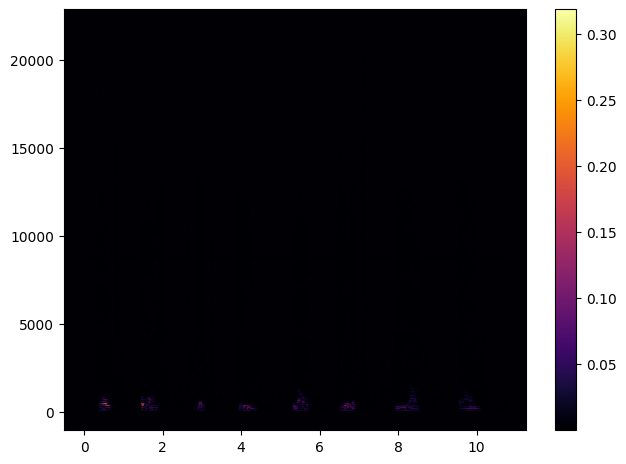

In [11]:
sp.plot()
sp.play()

In [4]:
sp2 = Spectrum([p for p in sp.partials if len(p) > 2 and p.duration > 0.02 and p.meanfreq() < 12000])
print(len(sp2), len([p for p in sp2 if p.meanfreq() > 4000]))
# sp2.plot()
sp2

3623 1982


Spectrum(numpartials=3623, start=0.014, end=10.726)

In [5]:
tracks, noisetracks, unfittedpartials = sp2.splitInTracks(maxtracks=10, distribution=None, noisetracks=3, noisefreq=2000, noisebw=0.2, relerror=0.1)
pprint(tracks)
pprint(noisetracks)
partials = sum([track.partials for track in tracks], start=[])
sp2sum = Spectrum(partials)
print(f"{len(sp2sum)}, > 3000: {sum(1 for p in sp2sum if p.meanfreq() > 3000)}, audibility: {sum(p.audibility() for p in sp2sum):.5g}")
sp2sum


/home/em/.virtualenvs/maelzel39/lib/python3.9/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


Evaluating distribution 0.8111456180001682
Evaluating distribution 2.180339887498948
Evaluating distribution 0.5777087639996635
Evaluating distribution 0.8640011417809259
Evaluating distribution 0.8375733798905471
Evaluating distribution 0.8274788730950116
Evaluating distribution 0.8212401247957037
[Track(partials=14, range=2G-5F, start=0.317, end=10.250),
 Track(partials=21, range=2G#-5F#, start=0.319, end=10.635),
 Track(partials=28, range=2G#-5G, start=0.016, end=10.706),
 Track(partials=28, range=2A-5G#, start=0.048, end=10.726),
 Track(partials=28, range=3D-5A#, start=0.017, end=10.655),
 Track(partials=27, range=3D#-6D, start=0.015, end=10.527),
 Track(partials=30, range=3G-6G, start=0.032, end=10.714),
 Track(partials=26, range=3G#-6G, start=0.014, end=10.645),
 Track(partials=23, range=4C-6A, start=0.028, end=10.552),
 Track(partials=32, range=4D#-7D#, start=0.032, end=10.582)]
[Track(partials=17, range=6B-8G, start=0.431, end=10.673),
 Track(partials=18, range=7C#-9D#, start=0

Spectrum(numpartials=257, start=0.317, end=10.726)

In [29]:
%prun tracks, noisetracks, unfittedpartials = sp2.splitInTracks(maxtracks=10, distribution=2, noisetracks=3, noisefreq=2000, noisebw=0.2, relerror=0.05)


         1326250 function calls (1326137 primitive calls) in 1.074 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     4286    0.250    0.000    0.581    0.000 packing.py:303(_bestTrackAppend)
   100204    0.249    0.000    0.269    0.000 packing.py:290(_rateFitAppend)
    76092    0.077    0.000    0.159    0.000 partial.py:138(audibility)
    44133    0.056    0.000    0.146    0.000 pack.py:25(_ratePartial)
    76092    0.046    0.000    0.053    0.000 amplitudesensitivity.py:112(acurveAmplitudeCompensation)
   104384    0.035    0.000    0.035    0.000 packing.py:176(end)
    76092    0.029    0.000    0.082    0.000 amplitudesensitivity.py:47(__call__)
       52    0.027    0.001    0.143    0.003 pack.py:247(<listcomp>)
    42811    0.023    0.000    0.036    0.000 track.py:87(partialBefore)
   221150    0.022    0.000    0.022    0.000 {method 'append' of 'list' objects}
     6311    0.021    0.000    0.171    0.000



--Csound version 6.19 (double samples) Apr 17 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:Built-in Audio Analogue Stereo: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Analogue Stereo:
SECTION 1:
skip: 0, numcols: 31, numrows: 926, idt: 0.011600 


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0002, p4=0 ifn:5=104 iskip:6=0 inumrows:7=926 inumcols:8=31 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

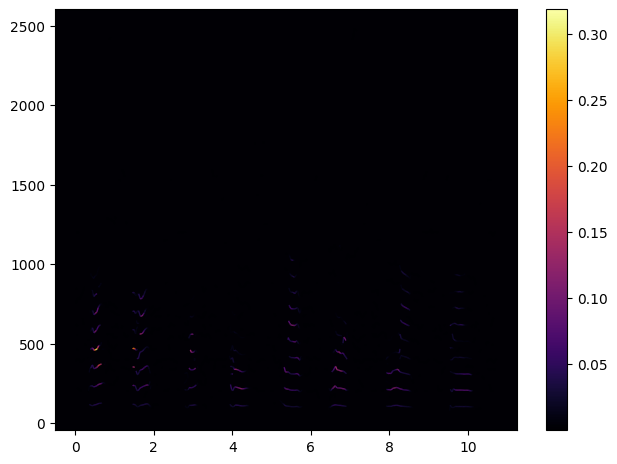

In [6]:
sp2sum.plot()
sp2sum.play()

54 4


Button(description='Stop', style=ButtonStyle())

Output()

skip: 0, numcols: 10, numrows: 1078, idt: 0.009600 


Synth(▶ .playPartials:501.0003, p4=0 ifn:5=105 iskip:6=0 inumrows:7=1078 inumcols:8=10 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

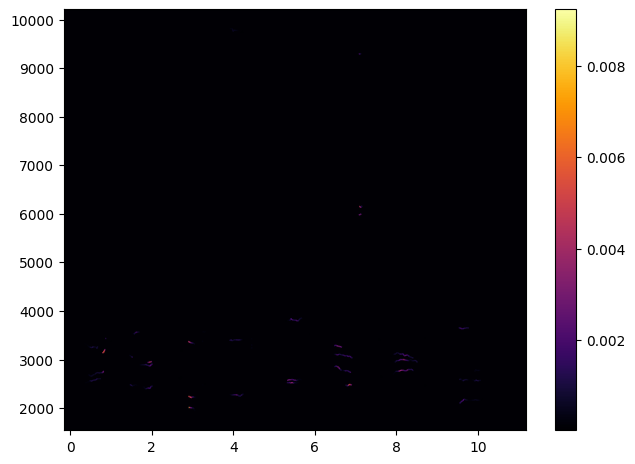

In [7]:
noisepartials = sum([track.partials for track in noisetracks], start=[])
noisesp = Spectrum(noisepartials)
print(len(noisesp), sum(1 for p in noisesp if p.meanfreq() > 5000))

noisesp.plot()
noisesp.play()

311


skip: 0, numcols: 40, numrows: 976, idt: 0.011000 


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0008, p4=0 ifn:5=106 iskip:6=0 inumrows:7=976 inumcols:8=40 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

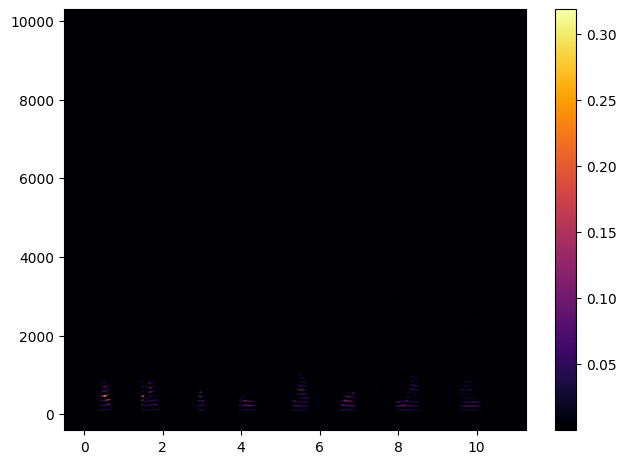

In [12]:
sp3 = Spectrum(sp2sum.partials + noisepartials)
print(len(sp3.partials))
sp3.plot()
sp3.play()

In [65]:
sp3.play()

skip: 0, numcols: 40, numrows: 976, idt: 0.011000 


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0028, p4=0 ifn:5=118 iskip:6=0 inumrows:7=976 inumcols:8=40 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

In [12]:
tracks, residualtracks, residual = sp2.splitInTracks(8, maxresidual=4, relerror=0.001, numbands=3, distribution=0.8, maxrange=12*4, ampcurveIncidence=1., mingap=0.01, residualMinFreq=3500)
tracks

TypeError: splitInTracks() got an unexpected keyword argument 'maxresidual'

In [27]:
partials = sum(tracks, start=[])
partials.extend(sum(residualtracks, start=[]))
sp2sum = Spectrum(partials)
print(len(sp2sum), len([p for p in sp2sum if p.meanfreq() > 2500]))
sp2sum


57 5


Spectrum(numpartials=57, start=0.317, end=10.724)

In [12]:
sp2sum.plot()
sp2sum.play()

Button(description='Stop', style=ButtonStyle())

Output()

skip: 0, numcols: 43, numrows: 942, idt: 0.011400 


Synth(▶ .playPartials:501.0003, p4=0 ifn:5=104 iskip:6=0 inumrows:7=942 inumcols:8=43 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=6 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

In [51]:
residualsp = Spectrum(sum(residualtracks, start=[]))
residualsp.plot()

In [17]:
residualsp = Spectrum(residual)
residualsp

Spectrum(numpartials=3578, start=0.014, end=10.726)

In [16]:
residualsp.play()
residualsp.plot()

skip: 0, numcols: 475, numrows: 1471, idt: 0.007300 


In [24]:
[p for p in sp2sum if p.meanfreq() > 1000]

[Partial(numbreakpoints=39, start=5.2924, end=5.9032, meanfreq=1029.1, meanamp=-42.4dB,
 Partial(numbreakpoints=19, start=5.4490, end=5.7208, meanfreq=1133.2, meanamp=-37.3dB,
 Partial(numbreakpoints=19, start=8.2646, end=8.5368, meanfreq=1357.4, meanamp=-36.5dB,
 Partial(numbreakpoints=19, start=8.2650, end=8.5359, meanfreq=1145.8, meanamp=-33.7dB,
 Partial(numbreakpoints=22, start=8.2655, end=8.5888, meanfreq=1249.9, meanamp=-39.2dB]

In [9]:
energy = [p.energy() for p in sp2]
freq = [p.meanfreq() for p in sp2]
histogram.dependentHistogram(energy, freq, numbins=5, distribution=0.25)

[55.28872389134877,
 570.0792000398044,
 728.0708097873248,
 1137.4677214639146,
 3028.5946465120896,
 11999.592592029492]

In [60]:
counts, edges = np.histogram(freqenergy, bins=5)
print(edges)
print(edges*maxfreq)

[0.00514228 0.20414561 0.40314894 0.60215227 0.8011556  1.00015893]
[   61.70528027  2449.66417356  4837.62306685  7225.58196014
  9613.54085343 12001.49974672]


In [58]:
0.005142 * maxfreq 

61.70190510821565

In [24]:
H, x, y = np.histogram2d(energy, freq, bins=10)

In [27]:
plt.imshow(H, interpolation='nearest', origin='lower') # , extent=[x[0], x[-1], y[0],y[-1]])


In [14]:
min(freq)

55.28872389134877

In [15]:
np.histogram(freq, bins=10)

(array([574, 589, 600, 384, 398, 349, 415, 416, 388, 309]),
 array([   55.28872389,  1249.71911071,  2444.14949752,  3638.57988433,
         4833.01027115,  6027.44065796,  7221.87104477,  8416.30143159,
         9610.7318184 , 10805.16220522, 11999.59259203]))

In [17]:
synth = sp2.play(speed=0.5, freqscale=1, minfreq=1000, maxfreq=4000)
synth

skip: 0, numcols: 463, numrows: 1310, idt: 0.008200 


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0014, p4=0 ifn:5=104 iskip:6=0 inumrows:7=1310 inumcols:8=463 kspeed:9=0.5 kloop:10=0 kminfreq:11=1000 kmaxfreq:12=4000 iflags:13=0 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

In [18]:
synth.set(kminfreq=100)

In [8]:
synth

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playPartials:501.0003, p4=0 ifn:5=104 iskip:6=0 inumrows:7=1310 inumcols:8=463 kspeed:9=1 kloop:10=0 kminfreq:11=0 kmaxfreq:12=0 iflags:13=0 istart:14=0 istop:15=0 kfreqscale:16=1 ichan:17=1)

In [7]:
resynth = sp.synthesize()
samp = Sample(resynth, 44100)
samp.play()



--Csound version 6.19 (double samples) Apr 17 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 1024 sample-frame blocks
reading 8192-byte blks of shorts from adc:Built-in Audio Analogue Stereo: (RAW)
writing 2048 sample blks of 64-bit floats to dac:Built-in Audio Analogue Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playSample:501.0002, p4=0 isndtab:5=104 istart:6=0 ifadein:7=0.05 ifadeout:8=0.05 igaingroup:9=0 kchan:10=1 kspeed:11=1 kgain:12=1 kpan:13=-1 ixfade:14=-1)

In [6]:
resynth2 = sp2.synthesize()
samp2 = Sample(resynth2, 44100)
samp2.play()



--Csound version 6.19 (double samples) Apr 17 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 1024 sample-frame blocks
reading 8192-byte blks of shorts from adc:Built-in Audio Analogue Stereo: (RAW)
writing 2048 sample blks of 64-bit floats to dac:Built-in Audio Analogue Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playSample:501.0002, p4=0 isndtab:5=104 istart:6=0 ifadein:7=0.05 ifadeout:8=0.05 igaingroup:9=0 kchan:10=1 kspeed:11=1 kgain:12=1 kpan:13=-1 ixfade:14=-1)

In [6]:
sp3 = Spectrum([p.simplified(freqthreshold=0.5) for p in sp.partials if len(p) >= 2 and p.duration > 0.04 and p.meanfreq() < 4500 and p.meanamp() > db2amp(-55)])
sp3

Spectrum(numpartials=230, start=0.342, end=10.367)

In [8]:
resynth3 = sp3.synthesize()
samp3 = Sample(resynth3, 44100)
samp3.play()



--Csound version 6.19 (double samples) Apr 17 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 1024 sample-frame blocks
reading 8192-byte blks of shorts from adc:Built-in Audio Analogue Stereo: (RAW)
writing 2048 sample blks of 64-bit floats to dac:Built-in Audio Analogue Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ .playSample:501.0002, p4=0 isndtab:5=104 istart:6=0 ifadein:7=0.05 ifadeout:8=0.05 igaingroup:9=0 kchan:10=1 kspeed:11=1 kgain:12=1 kpan:13=-1 ixfade:14=-1)

In [8]:
sp4, residue = sp.filter(maxfreq=6000, minfreq=40, mindur=0.03, minpercentile=0.02)

In [9]:
sp4, residue

(Spectrum(numpartials=85, start=0.342, end=10.367),
 Spectrum(numpartials=7288, start=0.010, end=10.728))

Sample(dur=10.36673469387755, sr=44100, ch=1)
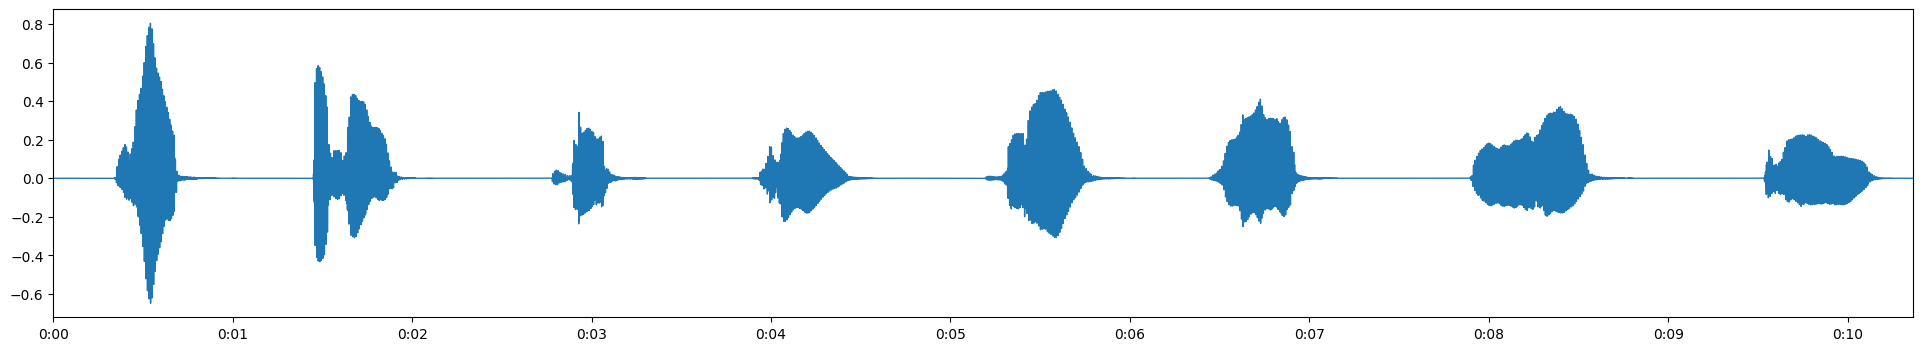

In [10]:
sp4.synthesize()

In [46]:
low, rest = sp.filter(maxfreq=3500)
middle, high = rest.filter(maxfreq=6000)

low2 = low.filter(minpercentile=0.05)[0]
middle2 = middle.filter(minpercentile=0.3)[0]
high2 = high.filter(minpercentile=0.1)[0]

low2, middle2, high2


(Spectrum(numpartials=73, start=0.342, end=10.367),
 Spectrum(numpartials=23, start=0.421, end=9.753),
 Spectrum(numpartials=13, start=0.012, end=10.724))

In [45]:
sp2 = Spectrum(low2.partials+middle2.partials + high2.partials)
sp2

Spectrum(numpartials=108, start=0.342, end=10.724)

In [33]:
sp2.plotmpl()

Sample(dur=10.723922902494332, sr=44100, ch=1)
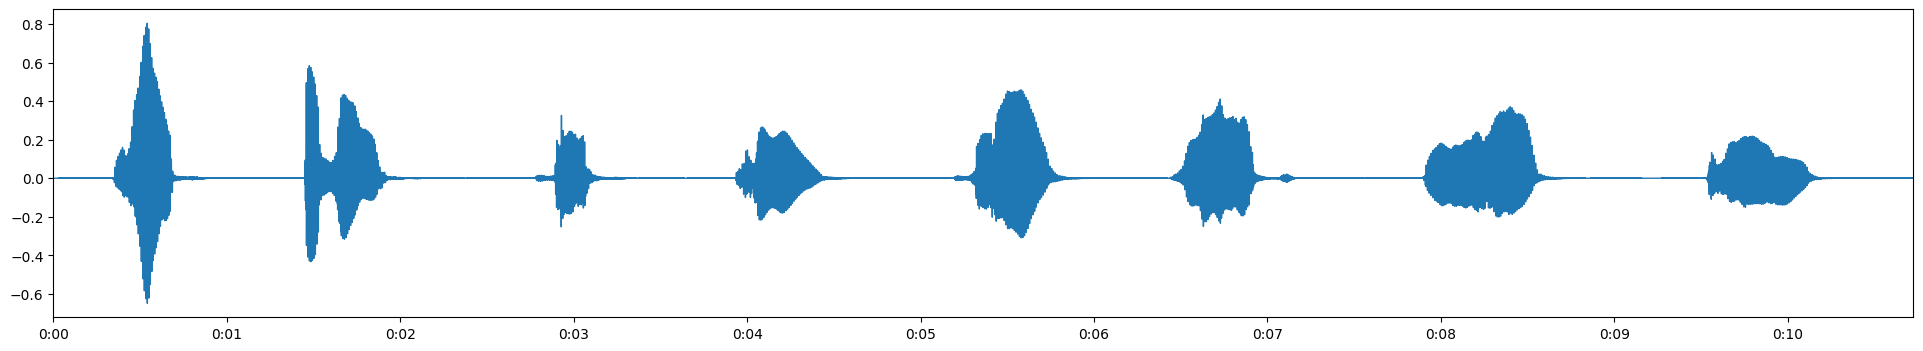

In [43]:
sp2.synthesize()